In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d_train = pd.read_csv('./train.csv')
d_test = pd.read_csv('./test.csv')

In [3]:
d_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
d_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
d_test = d_test.drop('Cabin',axis=1)
d_train = d_train.drop('Cabin', axis=1)

In [6]:
d_train = d_train.drop(['Name'],axis=1)
d_test = d_test.drop(['Name'],axis=1)

In [7]:
d_train.shape

(891, 10)

In [8]:
d_test = d_test.drop('PassengerId',axis=1)
d_train = d_train.drop('PassengerId', axis=1)

In [9]:
d_test = d_test.drop('Ticket',axis=1)
d_train = d_train.drop('Ticket', axis=1)

In [10]:
d_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
d_train['Age'].fillna(int(d_train['Age'].mean()), inplace=True)

In [12]:
d_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [13]:
d_test['Age'].fillna(int(d_test['Age'].mean()), inplace=True)

In [14]:
categorical_cols = ['Pclass','Sex','SibSp','Parch','Embarked']
d_train = pd.get_dummies(d_train, columns=categorical_cols)

In [15]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    uint8  
 4   Pclass_2    891 non-null    uint8  
 5   Pclass_3    891 non-null    uint8  
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   SibSp_0     891 non-null    uint8  
 9   SibSp_1     891 non-null    uint8  
 10  SibSp_2     891 non-null    uint8  
 11  SibSp_3     891 non-null    uint8  
 12  SibSp_4     891 non-null    uint8  
 13  SibSp_5     891 non-null    uint8  
 14  SibSp_8     891 non-null    uint8  
 15  Parch_0     891 non-null    uint8  
 16  Parch_1     891 non-null    uint8  
 17  Parch_2     891 non-null    uint8  
 18  Parch_3     891 non-null    uint8  
 19  Parch_4     891 non-null    u

In [16]:
d_test = pd.get_dummies(d_test, columns=categorical_cols)

In [17]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   Fare        417 non-null    float64
 2   Pclass_1    418 non-null    uint8  
 3   Pclass_2    418 non-null    uint8  
 4   Pclass_3    418 non-null    uint8  
 5   Sex_female  418 non-null    uint8  
 6   Sex_male    418 non-null    uint8  
 7   SibSp_0     418 non-null    uint8  
 8   SibSp_1     418 non-null    uint8  
 9   SibSp_2     418 non-null    uint8  
 10  SibSp_3     418 non-null    uint8  
 11  SibSp_4     418 non-null    uint8  
 12  SibSp_5     418 non-null    uint8  
 13  SibSp_8     418 non-null    uint8  
 14  Parch_0     418 non-null    uint8  
 15  Parch_1     418 non-null    uint8  
 16  Parch_2     418 non-null    uint8  
 17  Parch_3     418 non-null    uint8  
 18  Parch_4     418 non-null    uint8  
 19  Parch_5     418 non-null    u

In [18]:
X = d_train.drop(['Survived'], axis=1)
y = d_train['Survived']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [20]:
y_test.value_counts(normalize=True)

0    0.653631
1    0.346369
Name: Survived, dtype: float64

In [21]:
y_train.value_counts(normalize=True)


0    0.606742
1    0.393258
Name: Survived, dtype: float64

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
classifier.score(X_train,y_train)

0.9803370786516854

In [25]:
classifier.score(X_test,y_test)

0.7932960893854749

In [26]:
classifier.predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [27]:
classifier.predict_proba(X_test)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  ,

In [28]:
y_pred = classifier.predict_proba(X_test)[:,1]

In [29]:
new_y = []
for i in range (len(y_pred)):
    if y_pred[i]<0.6:
        new_y.append(0)
    else:
        new_y.append(1)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,new_y)

0.7932960893854749

## Changing the Max Depth

In [32]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=10)
    classifier.fit(X_train,y_train)
    train_accuracy.append(classifier.score(X_train,y_train))
    test_accuracy.append(classifier.score(X_test,y_test))

In [33]:
frame = pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.778090,0.821229
1,2,0.778090,0.821229
2,3,0.806180,0.821229
3,4,0.831461,0.810056
4,5,0.853933,0.837989


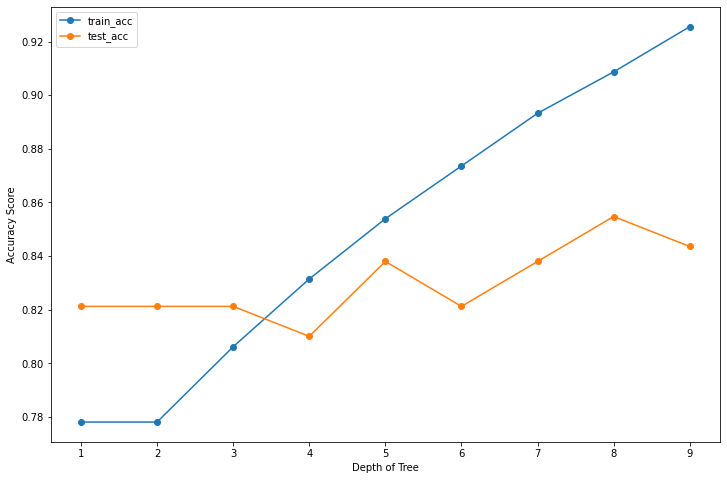

In [34]:
plt.figure(figsize=(12,8))
plt.plot(frame['max_depth'],frame['train_acc'], marker='o')
plt.plot(frame['max_depth'],frame['test_acc'], marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy Score')
plt.legend(['train_acc','test_acc'])

## Changing Max Leaf Nodes

In [35]:
train_accuracy = []
test_accuracy = []
for leaf in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=10)
    classifier.fit(X_train,y_train)
    train_accuracy.append(classifier.score(X_train,y_train))
    test_accuracy.append(classifier.score(X_test,y_test))

In [36]:
frame2 = pd.DataFrame({'max_leaf_nodes':range(2,15),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame2.head(15)

,max_leaf_nodes,train_acc,test_acc
0,2,0.778090,0.821229
1,3,0.778090,0.821229
2,4,0.804775,0.821229
3,5,0.804775,0.821229
4,6,0.806180,0.826816
5,7,0.817416,0.826816
6,8,0.823034,0.837989
7,9,0.827247,0.843575
8,10,0.827247,0.843575
9,11,0.835674,0.826816


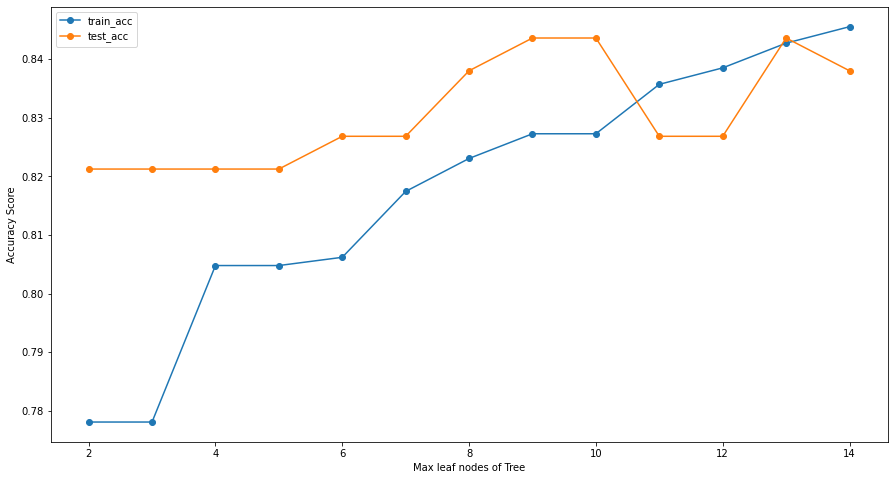

In [37]:
plt.figure(figsize=(15,8))
plt.plot(frame2['max_leaf_nodes'],frame2['train_acc'], marker='o')
plt.plot(frame2['max_leaf_nodes'],frame2['test_acc'], marker='o')
plt.xlabel('Max leaf nodes of Tree')
plt.ylabel('Accuracy Score')
plt.legend(['train_acc','test_acc'])

## Changing Min Samples Split

In [38]:
train_accuracy = []
test_accuracy = []
for split in range(2,15):
    classifier = DecisionTreeClassifier(min_samples_split=split, random_state=10)
    classifier.fit(X_train,y_train)
    train_accuracy.append(classifier.score(X_train,y_train))
    test_accuracy.append(classifier.score(X_test,y_test))

In [39]:
frame3 = pd.DataFrame({'min_samples_split':range(2,15),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame3.head(15)

,min_samples_split,train_acc,test_acc
0,2,0.980337,0.776536
1,3,0.963483,0.798883
2,4,0.956461,0.793296
3,5,0.948034,0.798883
4,6,0.933989,0.798883
5,7,0.928371,0.810056
6,8,0.918539,0.798883
7,9,0.910112,0.821229
8,10,0.898876,0.849162
9,11,0.897472,0.860335


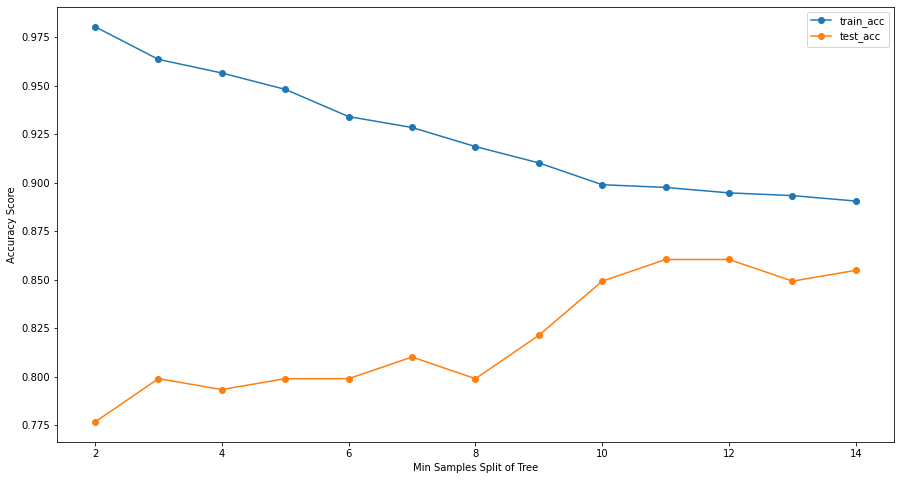

In [40]:
plt.figure(figsize=(15,8))
plt.plot(frame3['min_samples_split'],frame3['train_acc'], marker='o')
plt.plot(frame3['min_samples_split'],frame3['test_acc'], marker='o')
plt.xlabel('Min Samples Split of Tree')
plt.ylabel('Accuracy Score')
plt.legend(['train_acc','test_acc'])

## Changing Min Samples Leaf

In [41]:
train_accuracy = []
test_accuracy = []
for leaf in range(2,15):
    classifier = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=10)
    classifier.fit(X_train,y_train)
    train_accuracy.append(classifier.score(X_train,y_train))
    test_accuracy.append(classifier.score(X_test,y_test))

In [42]:
frame4 = pd.DataFrame({'min_samples_leaf':range(2,15),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame4.head(15)

,min_samples_leaf,train_acc,test_acc
0,2,0.914326,0.821229
1,3,0.904494,0.815642
2,4,0.887640,0.860335
3,5,0.876404,0.860335
4,6,0.865169,0.843575
5,7,0.852528,0.843575
6,8,0.849719,0.843575
7,9,0.845506,0.837989
8,10,0.844101,0.843575
9,11,0.838483,0.837989


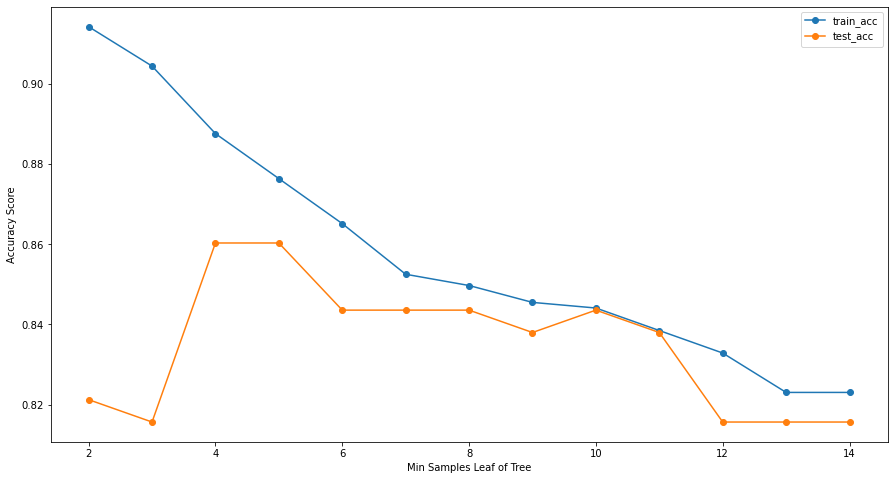

In [43]:
plt.figure(figsize=(15,8))
plt.plot(frame4['min_samples_leaf'],frame4['train_acc'], marker='o')
plt.plot(frame4['min_samples_leaf'],frame4['test_acc'], marker='o')
plt.xlabel('Min Samples Leaf of Tree')
plt.ylabel('Accuracy Score')
plt.legend(['train_acc','test_acc'])

In [44]:
classifier = DecisionTreeClassifier(max_depth=8,min_samples_leaf=5,min_samples_split=11,max_leaf_nodes=10)

In [45]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=10, min_samples_leaf=5,
                       min_samples_split=11)

In [46]:
classifier.score(X_train,y_train)

0.8300561797752809

In [47]:
classifier.score(X_test,y_test)

0.8156424581005587

In [48]:
from sklearn import tree

In [49]:
!pip3 install graphviz

[Text(131.52857142857144, 195.696, 'X[6] <= 0.5\ngini = 0.477\nsamples = 712\nvalue = [432, 280]'),
 Text(47.82857142857143, 152.208, 'X[4] <= 0.5\ngini = 0.388\nsamples = 258\nvalue = [68, 190]'),
 Text(23.914285714285715, 108.72, 'gini = 0.11\nsamples = 137\nvalue = [8, 129]'),
 Text(71.74285714285715, 108.72, 'X[1] <= 24.808\ngini = 0.5\nsamples = 121\nvalue = [60, 61]'),
 Text(47.82857142857143, 65.232, 'X[23] <= 0.5\ngini = 0.479\nsamples = 98\nvalue = [39, 59]'),
 Text(23.914285714285715, 21.744, 'gini = 0.369\nsamples = 45\nvalue = [11, 34]'),
 Text(71.74285714285715, 21.744, 'gini = 0.498\nsamples = 53\nvalue = [28, 25]'),
 Text(95.65714285714286, 65.232, 'gini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(215.22857142857143, 152.208, 'X[2] <= 0.5\ngini = 0.318\nsamples = 454\nvalue = [364, 90]'),
 Text(167.4, 108.72, 'X[0] <= 13.0\ngini = 0.257\nsamples = 356\nvalue = [302, 54]'),
 Text(143.4857142857143, 65.232, 'X[1] <= 20.8\ngini = 0.499\nsamples = 25\nvalue = [12, 13]'),

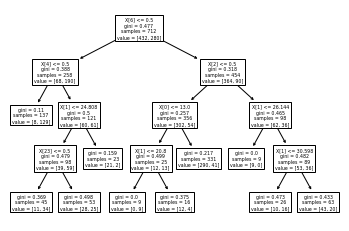

In [50]:
tree.plot_tree(classifier)

In [51]:
??plt.subplots

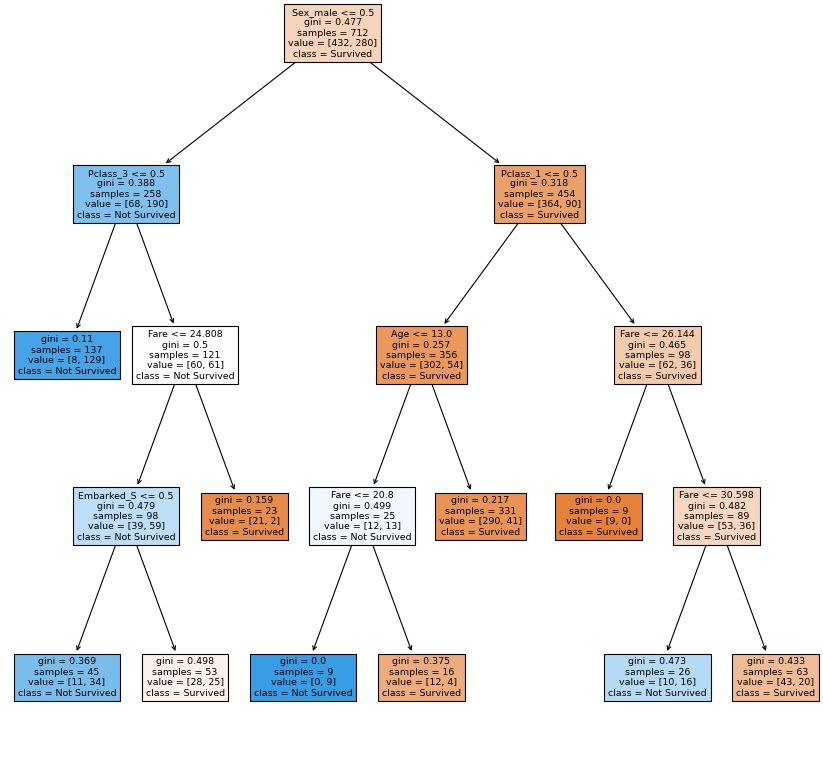

In [52]:
cn = ['Survived','Not Survived']
fig, axes = plt.subplots(nrows = 1,ncols = 1, dpi=80, figsize=(12,12))
tree.plot_tree(classifier,
               feature_names = X_train.columns,
               class_names= cn,
               filled = True);